# 决策树模型可视化

## 数据

链接: https://pan.baidu.com/s/1ze8eJnhNYoqOEg5XZkG3CA?pwd=qkma 提取码: qkma 
--来自百度网盘超级会员v7的分享

![20231204215008](https://cdn.jsdelivr.net/gh/hivandu/notes/img/20231204215008.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from six import StringIO
from sklearn.tree import export_graphviz

In [2]:
# 导入数据
train_data = pd.read_csv('~/mount/Sync/data/AI_Cheats/Titanic_Data/train.csv')
test_data = pd.read_csv('~/mount/Sync/data/AI_Cheats/Titanic_Data/test.csv')

In [3]:
print('\ndescribe:{} \n'.format(train_data.describe()))
print('\nnull: {} \n'.format(train_data.isnull().any()))

print('\nvalue counts: {} \n'.format(train_data['Embarked'].value_counts()))


describe:       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   


null: PassengerId    False
Survived       False
Pclass         False

In [4]:
# 使用平均年龄来填充年龄中的NaN值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [5]:
# 使用票价的均值填充票价中的NaN值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
print(train_data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [6]:
# 使用登陆最多的港口来填充登陆港口的NaN值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

In [7]:
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
train_features = train_data[features]

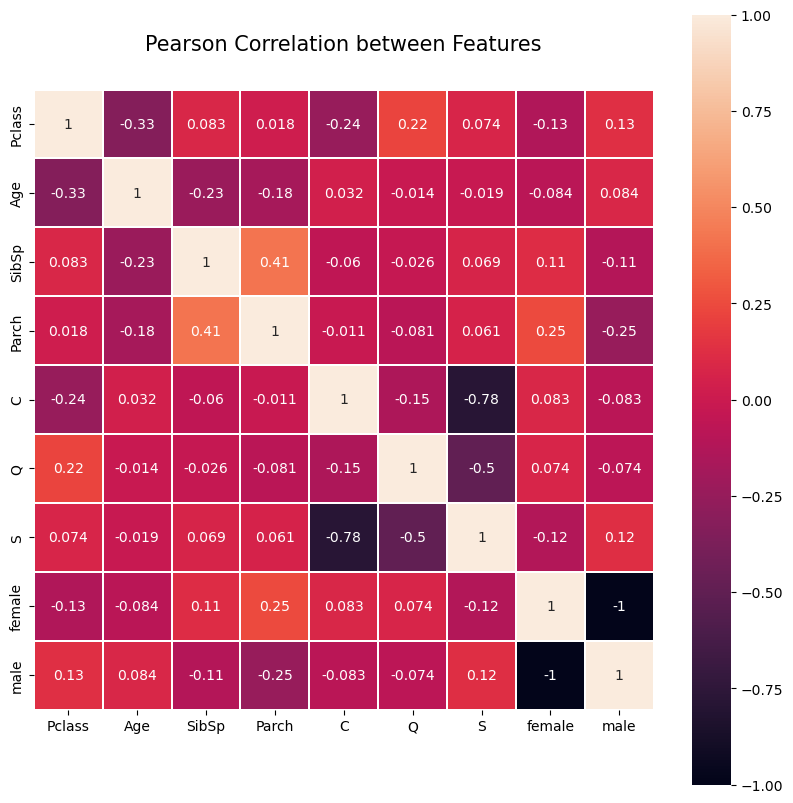

In [8]:
# 显示特征之间的相关系数
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation between Features', y=1.05, size=15)

# 原来Embarked是一列，通过onehot编码，变成3列
train_data_hot_encoded = train_features.drop('Embarked', axis=1).join(train_features.Embarked.str.get_dummies())
train_data_hot_encoded = train_data_hot_encoded.drop('Sex', axis=1).join(train_data_hot_encoded.Sex.str.get_dummies())

# 计算特征之间的Pearson系数，即相似度
sns.heatmap(train_data_hot_encoded.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()

<Axes: ylabel='Survived'>

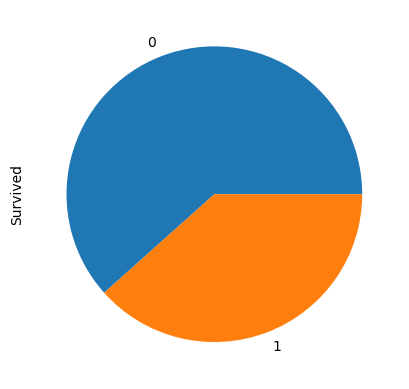

In [9]:
# 使用饼图来进行Survived取值的可视化
train_data['Survived'].value_counts().plot(kind='pie', label='Survived')

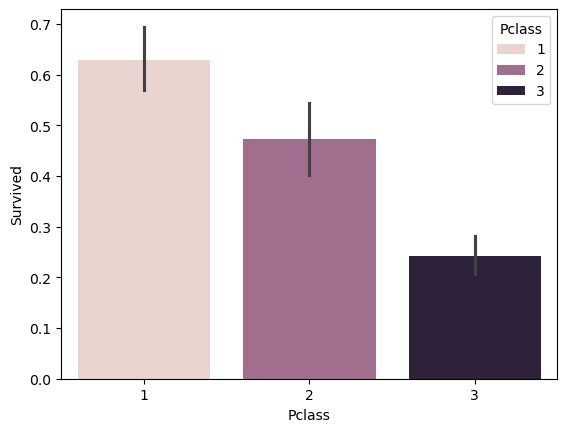

In [10]:
# 不同的Pclass, 幸存人数（条形图）
sns.barplot(x='Pclass', hue='Pclass', y='Survived', data=train_data)
plt.show()

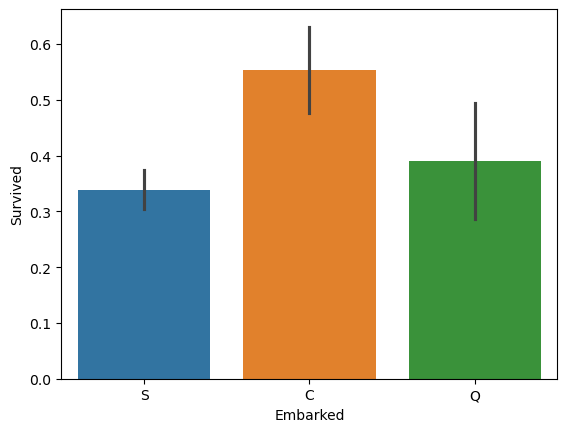

In [11]:
# 不同Embarked幸存人数(条形图)
sns.barplot(x='Embarked', hue='Embarked', y='Survived', data=train_data)
plt.show()

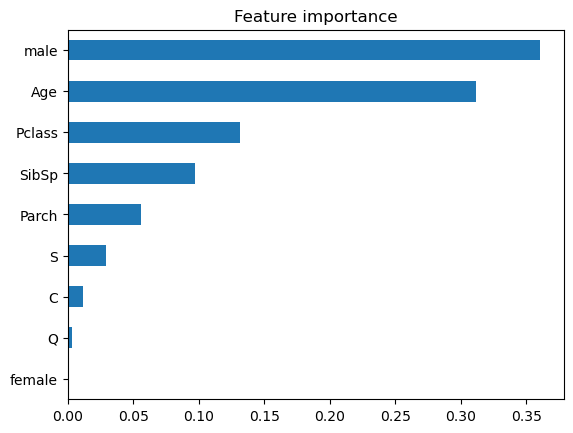

In [15]:
def train(train_features, train_labels):
    # 构造CART决策树
    clf = DecisionTreeClassifier()
    clf.fit(train_features, train_labels)

    # 显示特征向量的重要性
    coeffs = clf.feature_importances_
    df_co = pd.DataFrame(coeffs, columns=['importance_'])

    # 下标设置为Feature Name
    df_co.index = train_features.columns
    df_co.sort_values('importance_', ascending=True, inplace=True)
    df_co.importance_.plot(kind='barh')
    plt.title('Feature importance')
    plt.show()

    return clf

clf = train(train_data_hot_encoded, train_data['Survived'])

# 决策树可视化
def show_tree(clf):
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_pdf('./dataset/titanic_tree.pdf')

show_tree(clf)